# Emotion Classification

## Importing Libraries

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab.patches import cv2_imshow
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization

## Loading the Images

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Datasets/fer_images.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

### Viewing Sample Training Images

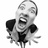

In [ ]:
# Angry Image
tf.keras.preprocessing.image.load_img('/content/fer2013/train/Angry/1003.jpg')

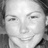

In [ ]:
# Happy Image
tf.keras.preprocessing.image.load_img('/content/fer2013/train/Happy/1.jpg')

## Defining Train & Test Sets

### Defining the Training Set

In [ ]:
# Scaling Images
training_generator = ImageDataGenerator(rescale=1./255,
                                        rotation_range=7,
                                        horizontal_flip=True,
                                        zoom_range=0.2)

In [ ]:
# Storing Training Images
train_dataset = training_generator.flow_from_directory('/content/fer2013/train',
                                                        target_size = (48, 48),
                                                        batch_size = 16,
                                                        class_mode = 'categorical',
                                                        shuffle = True)

Found 28709 images belonging to 7 classes.


### Defining the Test Set

In [ ]:
# Scaling Images
test_generator = ImageDataGenerator(rescale=1./255)

# Storing Test Images
test_dataset = test_generator.flow_from_directory('/content/fer2013/validation',
                                                  target_size = (48, 48),
                                                  batch_size = 1,
                                                  class_mode = 'categorical',
                                                  shuffle = False)

Found 3589 images belonging to 7 classes.


## Data Examination

### Confirming Categorical Outputs
--> 7 Emotions: Category 0 to 6

In [ ]:
train_dataset.classes

array([0, 0, 0, ..., 6, 6, 6], dtype=int32)

### Viewing Training Data by Category

In [ ]:
np.unique(train_dataset.classes, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6], dtype=int32),
 array([3995,  436, 4097, 7215, 4965, 4830, 3171]))

### Plotting Training Data

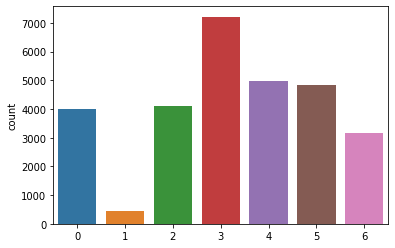

In [ ]:
sns.countplot(x = train_dataset.classes);

### Confirming Classes / Emotions

In [ ]:
train_dataset.class_indices

{'Angry': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

## Building the CNN

### Defining CNN Structure

In [ ]:
# Defining Network Variables
num_detectors = 32
num_classes = 7
width, height = 48, 48
epochs = 70

# Initializing Sequential Model
network = Sequential()


# --- BLOCK 1 ---

# Adding Convolutional Layer
network.add(Conv2D(num_detectors, (3,3), activation = 'relu', padding = 'same', input_shape = (width, height, 3)))

# Adding Batch Normalization
network.add(BatchNormalization())

# Adding Convolutional Layer
network.add(Conv2D(num_detectors, (3,3), activation = 'relu', padding = 'same'))

# Adding Batch Normalization
network.add(BatchNormalization())

# Adding Max Pooling Layer
network.add(MaxPooling2D(pool_size = (2,2))) # Storing Max Pixels

# Setting Dropout to 20%
network.add(Dropout(0.2)) # Avoid Overfitting


# --- BLOCK 2 ---

# Adding Convolutional Layer
network.add(Conv2D(2*num_detectors, (3,3), activation = 'relu', padding = 'same'))

# Adding Batch Normalization
network.add(BatchNormalization())

# Adding Convolutional Layer
network.add(Conv2D(2*num_detectors, (3,3), activation = 'relu', padding = 'same'))

# Adding Batch Normalization
network.add(BatchNormalization())

# Adding Max Pooling Layer
network.add(MaxPooling2D(pool_size = (2,2))) # Storing Max Pixels

# Setting Dropout to 20%
network.add(Dropout(0.2)) # Avoid Overfitting


# --- BLOCK 3 ---

# Adding Convolutional Layer
network.add(Conv2D(2*2*num_detectors, (3,3), activation = 'relu', padding = 'same'))

# Adding Batch Normalization
network.add(BatchNormalization())

# Adding Convolutional Layer
network.add(Conv2D(2*2*num_detectors, (3,3), activation = 'relu', padding = 'same'))

# Adding Batch Normalization
network.add(BatchNormalization())

# Adding Max Pooling Layer
network.add(MaxPooling2D(pool_size = (2,2))) # Storing Max Pixels

# Setting Dropout to 20%
network.add(Dropout(0.2)) # Avoid Overfitting


# --- BLOCK 4 ---

# Adding Convolutional Layer
network.add(Conv2D(2*2*2*num_detectors, (3,3), activation = 'relu', padding = 'same'))

# Adding Batch Normalization
network.add(BatchNormalization())

# Adding Convolutional Layer
network.add(Conv2D(2*2*2*num_detectors, (3,3), activation = 'relu', padding = 'same'))

# Adding Batch Normalization
network.add(BatchNormalization())

# Adding Max Pooling Layer
network.add(MaxPooling2D(pool_size = (2,2))) # Storing Max Pixels

# Setting Dropout to 20%
network.add(Dropout(0.2)) # Avoid Overfitting


# --- FLATTENING ---

# Flattening Matrix Data
network.add(Flatten())


# --- BLOCK 5 ---

# Adding a Dense Layeer
network.add(Dense(2 * num_detectors, activation = 'relu'))

# Adding Batch Normalization
network.add(BatchNormalization())

# Setting Dropout to 20%
network.add(Dropout(0.2)) # Avoid Overfitting


# --- BLOCK 6 ---

# Adding a Dense Layeer
network.add(Dense(2 * num_detectors, activation = 'relu'))

# Adding Batch Normalization
network.add(BatchNormalization())

# Setting Dropout to 20%
network.add(Dropout(0.2)) # Avoid Overfitting


# --- PROBABILITIES ---

# Generating Probabilities for Each Category
network.add(Dense(num_classes, activation = 'softmax'))

# Viewing Network Summary
print(network.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 48, 48, 32)        896       
                                                                 
 batch_normalization_10 (Bat  (None, 48, 48, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_9 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 batch_normalization_11 (Bat  (None, 48, 48, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                      

### Compiling the Model

In [ ]:
network.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

### Training the Model

In [ ]:
network.fit(train_dataset, epochs=epochs)

Epoch 1/70
1795/1795 [==============================] - 44s 24ms/step - loss: 1.8752 - accuracy: 0.2558
Epoch 2/70
1795/1795 [==============================] - 44s 25ms/step - loss: 1.6019 - accuracy: 0.3725
Epoch 3/70
1795/1795 [==============================] - 42s 24ms/step - loss: 1.4338 - accuracy: 0.4468
Epoch 4/70
1795/1795 [==============================] - 41s 23ms/step - loss: 1.3363 - accuracy: 0.4928
Epoch 5/70
1795/1795 [==============================] - 43s 24ms/step - loss: 1.2733 - accuracy: 0.5187
Epoch 6/70
1795/1795 [==============================] - 43s 24ms/step - loss: 1.2369 - accuracy: 0.5388
Epoch 7/70
1795/1795 [==============================] - 43s 24ms/step - loss: 1.1832 - accuracy: 0.5582
Epoch 8/70
1795/1795 [==============================] - 48s 27ms/step - loss: 1.1603 - accuracy: 0.5670
Epoch 9/70
1795/1795 [==============================] - 42s 24ms/step - loss: 1.1357 - accuracy: 0.5773
Epoch 10/70
1795/1795 [==============================] - 45s 25m

## Saving the Model

In [ ]:
model_json = network.to_json()
with open('network_emotions.json','w') as json_file:
  json_file.write(model_json)

In [ ]:
from keras.models import save_model
network_saved = save_model(network, '/content/weights_emotions.hdf5')

In [ ]:
with open('/content/network_emotions.json', 'r') as json_file:
  json_saved_model = json_file.read()
json_saved_model

'{"class_name": "Sequential", "config": {"name": "sequential_1", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 48, 48, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "conv2d_8_input"}}, {"class_name": "Conv2D", "config": {"name": "conv2d_8", "trainable": true, "batch_input_shape": [null, 48, 48, 3], "dtype": "float32", "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "same", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "BatchNormalization", "config": {"name": "batch_normalization_10", "trainable": true, "dtype": "float32", "axis": [3], "momentum": 0.99, "epsilon": 

## Loading the Model

In [ ]:
network_loaded = tf.keras.models.model_from_json(json_saved_model)
network_loaded.load_weights('/content/weights_emotions.hdf5')
network_loaded.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
network_loaded.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 48, 48, 32)        896       
                                                                 
 batch_normalization_10 (Bat  (None, 48, 48, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_9 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 batch_normalization_11 (Bat  (None, 48, 48, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                      

## Evaluating the Neural Network

In [ ]:
network_loaded.evaluate(test_dataset)

3589/3589 [==============================] - 17s 4ms/step - loss: 1.4757 - accuracy: 0.5896


[1.4757378101348877, 0.5895792841911316]

In [ ]:
predictions = network_loaded.predict(test_dataset)
predictions

3589/3589 [==============================] - 12s 3ms/step


array([[6.88989282e-01, 1.71948608e-03, 3.73274758e-02, ...,
        1.19779833e-01, 1.45336151e-01, 6.34930981e-03],
       [9.73328471e-01, 1.16937379e-04, 2.47945841e-02, ...,
        1.97920905e-04, 1.16375950e-03, 3.85684951e-04],
       [9.78495300e-01, 4.19541379e-04, 6.53254334e-03, ...,
        6.48979738e-04, 1.15972515e-02, 1.02788081e-05],
       ...,
       [8.34739069e-04, 8.34068633e-05, 2.19255071e-02, ...,
        1.06060563e-03, 3.33634298e-03, 9.72457945e-01],
       [7.93971354e-04, 2.00000795e-05, 2.64113527e-02, ...,
        2.13911757e-02, 1.97314401e-03, 9.49117303e-01],
       [3.80820893e-02, 3.94358503e-04, 7.51138628e-02, ...,
        1.16664404e-02, 1.44184111e-02, 8.55872393e-01]], dtype=float32)

In [ ]:
predictions = np.argmax(predictions, axis = 1)
predictions

array([0, 0, 0, ..., 6, 6, 6])

In [ ]:
test_dataset.classes

array([0, 0, 0, ..., 6, 6, 6], dtype=int32)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(test_dataset.classes, predictions)

0.5895792699916411

In [ ]:
test_dataset.class_indices

{'Angry': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_dataset.classes, predictions)
cm

array([[289,   4,  49,  12,  39,  88,  10],
       [  7,  36,   4,   2,   0,   6,   0],
       [ 63,   2, 230,  11,  44, 132,  46],
       [ 17,   1,  10, 772,  33,  27,  19],
       [ 86,  11,  88, 156,  98, 125,  62],
       [ 56,   1,  52,  20,  93, 363,   9],
       [ 10,   1,  38,  18,   9,  12, 328]])

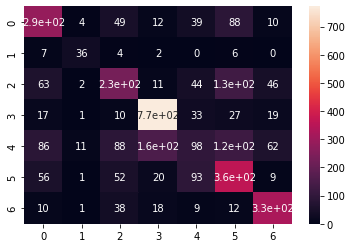

In [ ]:
sns.heatmap(cm, annot=True);

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_dataset.classes, predictions))

              precision    recall  f1-score   support

           0       0.55      0.59      0.57       491
           1       0.64      0.65      0.65        55
           2       0.49      0.44      0.46       528
           3       0.78      0.88      0.83       879
           4       0.31      0.16      0.21       626
           5       0.48      0.61      0.54       594
           6       0.69      0.79      0.74       416

    accuracy                           0.59      3589
   macro avg       0.56      0.59      0.57      3589
weighted avg       0.56      0.59      0.57      3589



## Classifying Images

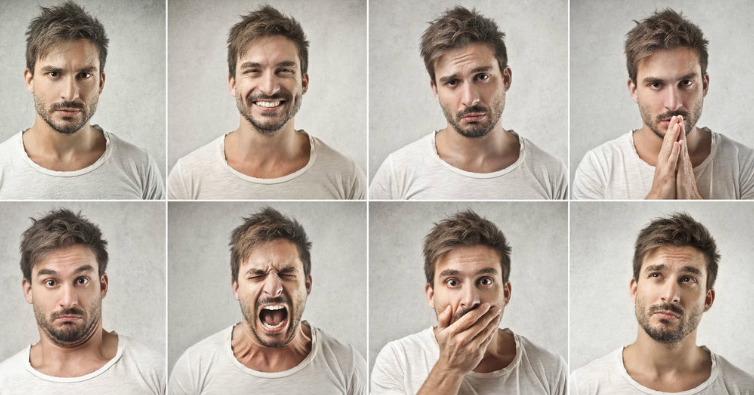

In [ ]:
image = cv2.imread('/content/drive/MyDrive/faces_emotions.png')
cv2_imshow(image)

In [ ]:
face_detector = cv2.CascadeClassifier('/content/drive/MyDrive/haarcascade_frontalface_default.xml')
faces = face_detector.detectMultiScale(image)
faces

array([[224,  35,  90,  90],
       [625,  49,  91,  91],
       [ 23,  41,  92,  92],
       [420,  43,  97,  97],
       [420, 242,  97,  97],
       [ 18, 243,  98,  98],
       [229, 242,  85,  85],
       [627, 241,  91,  91]], dtype=int32)

In [ ]:
test_dataset.class_indices.keys()

dict_keys(['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise'])

In [ ]:
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

1/1 [==============================] - 0s 16ms/step


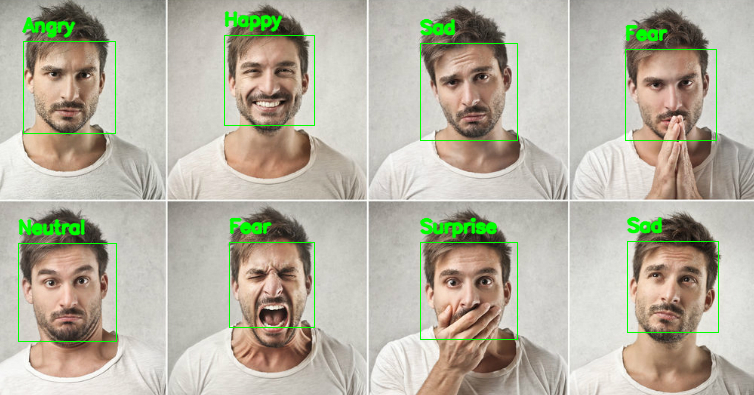

In [ ]:
for (x, y, w, h) in faces:
  cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 1)
  roi = image[y:y + h, x:x + w]
  #cv2_imshow(roi)
  roi = cv2.resize(roi, (48, 48))
  #cv2_imshow(roi)
  roi = roi / 255
  roi = np.expand_dims(roi, axis = 0)
  #print(roi.shape)
  prediction = network_loaded.predict(roi)
  #print(prediction)
  cv2.putText(image, emotions[np.argmax(prediction)], (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,0), 2, cv2.LINE_AA)
cv2_imshow(image)

## Classifying Emotions in Videos

In [ ]:
cap = cv2.VideoCapture('/content/drive/MyDrive/emotion_test.mp4')
connected, video = cap.read()
print(connected, video.shape)

True (360, 640, 3)


In [ ]:
save_path = '/content/drive/MyDrive/emotion_test_result.avi'
fourcc = cv2.VideoWriter_fourcc(*'XVID')
fps = 24
output_video = cv2.VideoWriter(save_path, fourcc, fps, (video.shape[1], video.shape[0]))

In [ ]:
while (cv2.waitKey(1) < 0):
  connected, frame = cap.read()
  if not connected:
    break
  faces = face_detector.detectMultiScale(frame, scaleFactor=1.2, minNeighbors=5, minSize=(30,30))
  if len(faces) > 0:
    for (x, y, w, h) in faces:
      frame = cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
      roi = frame[y:y + h, x:x + w]
      roi = cv2.resize(roi, (48, 48))
      roi = roi / 255
      roi = np.expand_dims(roi, axis = 0)
      prediction = network_loaded.predict(roi)

      if prediction is not None:
        result = np.argmax(prediction)
        cv2.putText(frame, emotions[result], (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 1, cv2.LINE_AA)
  
  cv2_imshow(frame)
  output_video.write(frame)

print('End')
output_video.release()
cv2.destroyAllWindows()